In [1]:
import numpy as np
import mne 
import scipy 
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
import cv2

In [3]:
#fps = vcap.get(cv2.CV_CAP_PROP_FPS)

video_path='../../../fd.mp4'
def get_frmae(video_path, second):
    
    #start=20
    
    vcap = cv2.VideoCapture( video_path)
    ret, frame = vcap.read()
    #fps = vcap.get(cv2.CAP_PROP_FPS)
    #times 1/24
    
    frame_num=int(second*24)

    for i in range(frame_num):
        #vcap = cv2.VideoCapture('../../../ks.mp4')
        ret, frame = vcap.read()
    #plt.close()
    print(second)
    print(i)
    plt.figure()
    plt.imshow(frame)

    
    #print(f"{fps} frames per second")


In [4]:
#get_frmae(video_path,0.6)
#get_frmae(video_path,45.6)

In [16]:
raw_data=mne.io.read_raw_brainvision('../../fd/NeoRec_2022-12-12_13-13-02.vhdr', preload=True)

Extracting parameters from ../../fd/NeoRec_2022-12-12_13-13-02.vhdr...
Setting channel info structure...
Reading 0 ... 1798385  =      0.000 ...   899.192 secs...


In [17]:
events,ids=mne.events_from_annotations(raw_data)

Used Annotations descriptions: ['1/Event', 'New Segment/']


In [18]:
raw_data

<RawBrainVision | NeoRec_2022-12-12_13-13-02.eeg, 15 x 1798386 (899.2 s), ~205.8 MB, data loaded>

In [19]:
raw_data.crop(events[-1,0]/raw_data.info['sfreq'], None)

<RawBrainVision | NeoRec_2022-12-12_13-13-02.eeg, 15 x 1746827 (873.4 s), ~199.9 MB, data loaded>

In [20]:
raw_data

<RawBrainVision | NeoRec_2022-12-12_13-13-02.eeg, 15 x 1746827 (873.4 s), ~199.9 MB, data loaded>

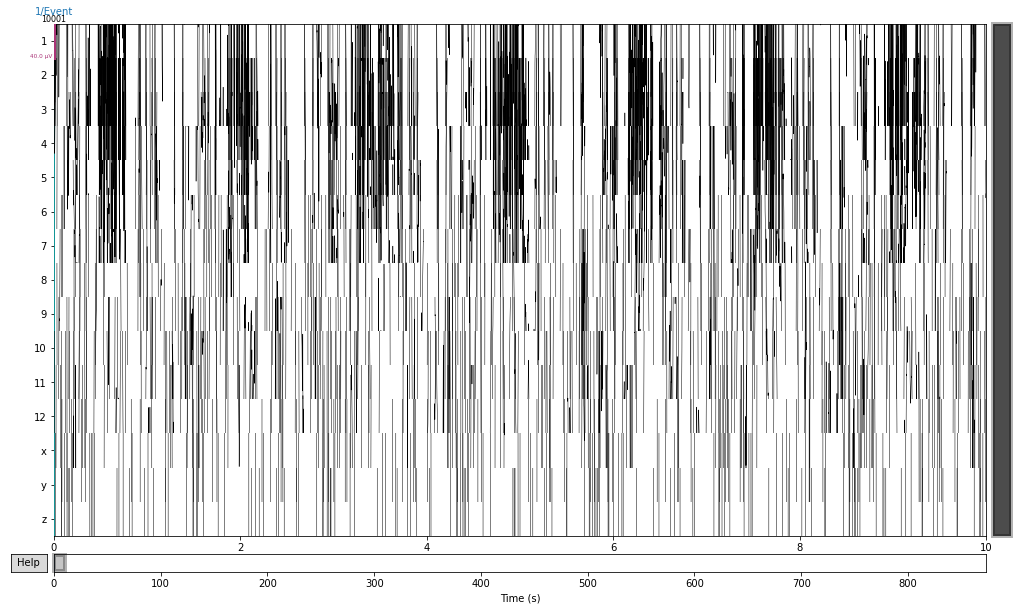

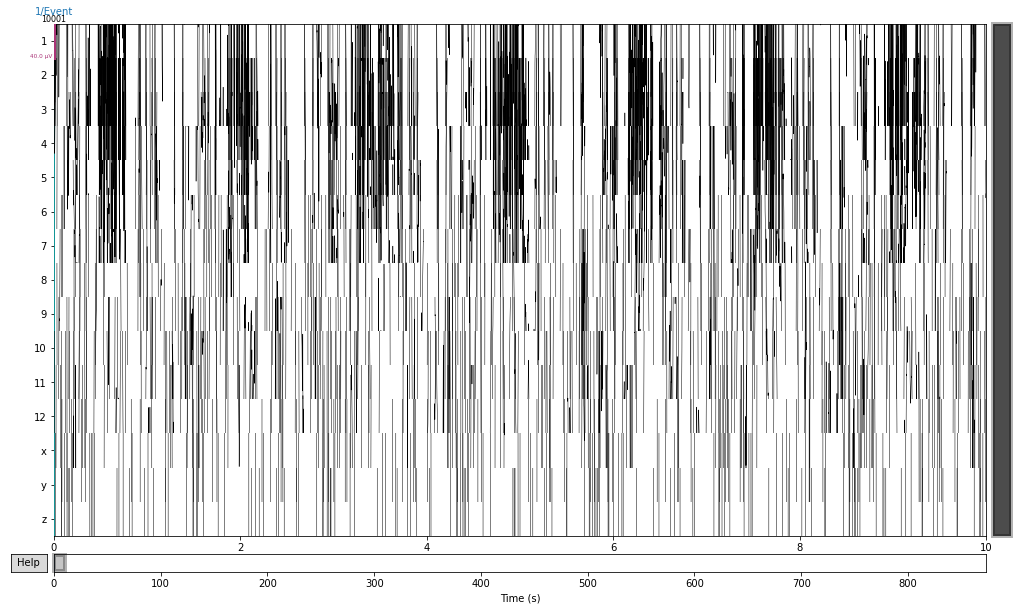

In [21]:
raw_data.plot(events, )

In [22]:
raw_data.ch_names

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'x', 'y', 'z']

In [23]:
raw_data_acc=raw_data.copy().drop_channels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

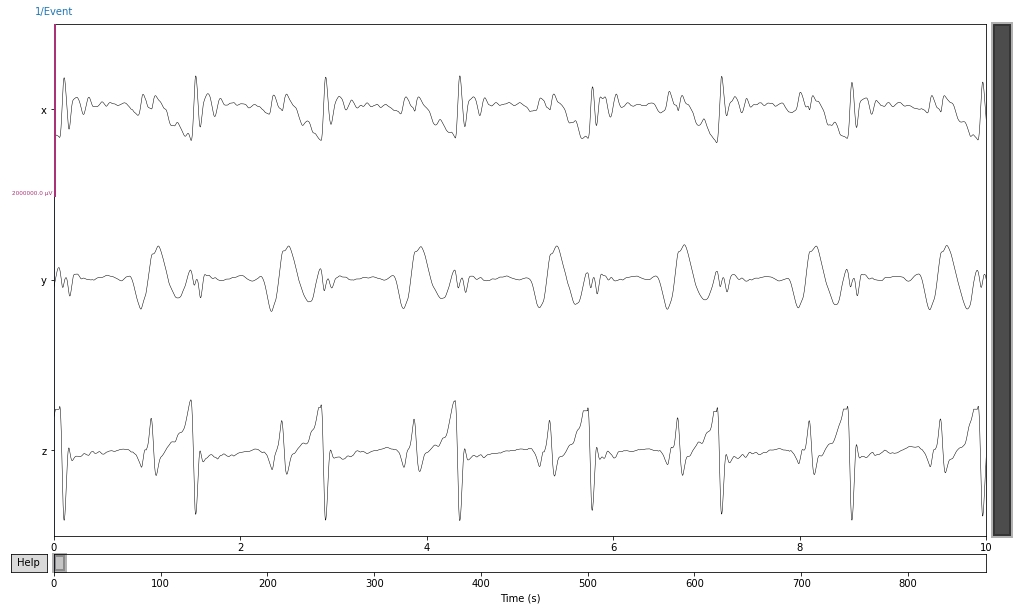

In [24]:
raw_data_acc.plot(scalings={'eeg':0.1e1})
plt.show()

In [25]:
xyz=raw_data_acc.get_data()


In [26]:
y_data=xyz[1,:]

In [41]:

start=1500
period=2800
end=start+period


In [42]:
raw_data.info

<Info | 7 non-empty values
 bads: []
 ch_names: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, x, y, z
 chs: 15 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: unspecified
 nchan: 15
 projs: []
 sfreq: 2000.0 Hz
>

"\nax[2].plot(np.arange(start+period*2,end+period*2)/raw_data.info['sfreq'],  xyz[:,start+period*2:end+period*2].T , label=['x', 'y', 'z'])\nax[2].set_title('Цикл 3-го шага')\nax[2].set_xlabel('Время, (сек)')\nax[2].set_ylabel('Амплитуда ')\nax[2].legend(loc='lower right')\n\n\n\nax[3].plot(np.arange(start+period*3,end+period*3)/raw_data.info['sfreq'],  xyz[:,start+period*3:end+period*3].T , label=['x', 'y', 'z'])\nax[3].set_title('Цикл 3-го шага')\nax[3].set_xlabel('Время, (сек)')\nax[3].set_ylabel('Амплитуда ')\nax[3].legend(loc='lower right')\n"

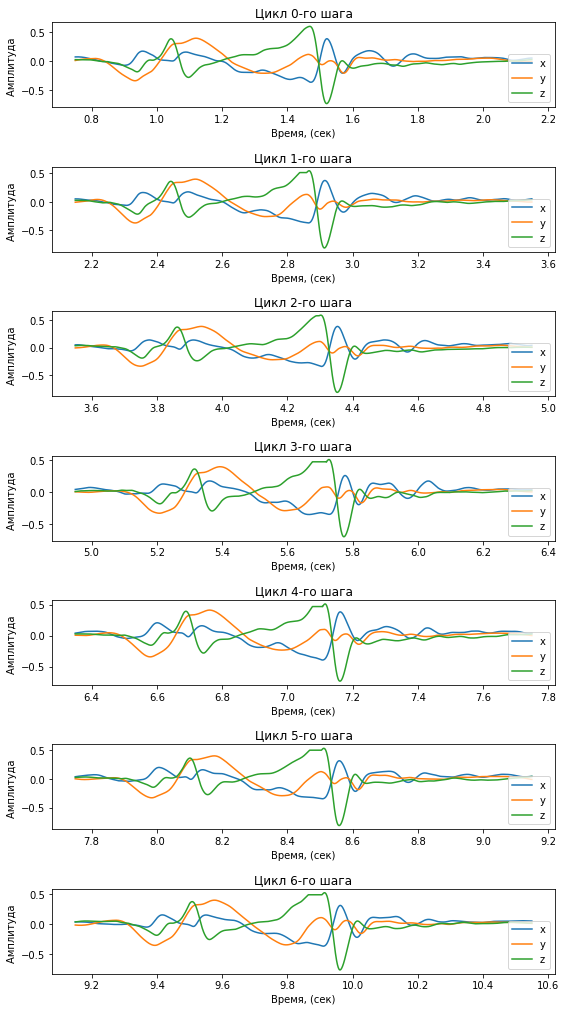

In [43]:
plt.close()

cycles=7

fig,ax=plt.subplots(cycles,1, figsize=(9,2.5*cycles))
plt.subplots_adjust(hspace=0.7)
'''
ax[0].plot(np.arange(start,end)/raw_data.info['sfreq'],  xyz[:,start:end].T , label=['x', 'y', 'z'])


ax[0].set_title('Цикл 1-го шага')
ax[0].set_xlabel('Время, (сек)')
ax[0].set_ylabel('Амплитуда ')
ax[0].legend(loc='lower right')
'''

for i in range(cycles):
    ax[i].plot( np.arange(start+period*i,end+period*i)/raw_data.info['sfreq'],  xyz[:,start+period*i:end+period*i].T  , label=['x', 'y', 'z'])
    ax[i].set_title('Цикл '+str(i)+'-го шага')
    ax[i].set_xlabel('Время, (сек)')
    ax[i].set_ylabel('Амплитуда ')
    ax[i].legend(loc='lower right')

'''
ax[2].plot(np.arange(start+period*2,end+period*2)/raw_data.info['sfreq'],  xyz[:,start+period*2:end+period*2].T , label=['x', 'y', 'z'])
ax[2].set_title('Цикл 3-го шага')
ax[2].set_xlabel('Время, (сек)')
ax[2].set_ylabel('Амплитуда ')
ax[2].legend(loc='lower right')



ax[3].plot(np.arange(start+period*3,end+period*3)/raw_data.info['sfreq'],  xyz[:,start+period*3:end+period*3].T , label=['x', 'y', 'z'])
ax[3].set_title('Цикл 3-го шага')
ax[3].set_xlabel('Время, (сек)')
ax[3].set_ylabel('Амплитуда ')
ax[3].legend(loc='lower right')
'''

In [46]:
out=np.convolve(y_data,xyz[1,start:end-1000], 'same')



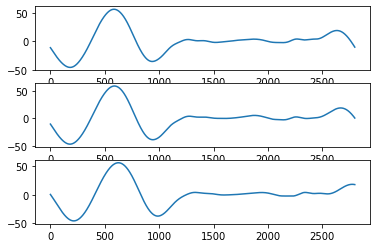

In [47]:
plt.close()

fig,ax=plt.subplots(3,1)
ax[0].plot(out[start+period*0:end+period*0].T)
ax[1].plot(out[start+period*1:end+period*1].T)
ax[2].plot(out[start+period*2:end+period*2].T)

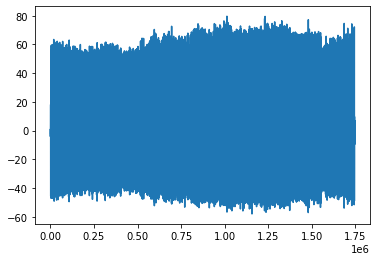

In [48]:
plt.close()
plt.plot(out)

In [49]:
def find_peaks(array_, koef=1.1, max_flg=False):

    mean_=np.mean(array_)
    std_=np.std(array_)

    max_=mean_+koef*std_
    min_=mean_-koef*std_

    max_array_=[max_]*len(array_)
    min_array_=[min_]*len(array_)

    inds=np.where(array_>max_)[0]
    
    if max_flg:
        return inds, max_
    
    else:
        return inds
    
    
def find_peaks_min(array_, koef=1.1, max_flg=False):

    mean_=np.mean(array_)
    std_=np.std(array_)

    max_=mean_+koef*std_
    min_=mean_-koef*std_

    max_array_=[max_]*len(array_)
    min_array_=[min_]*len(array_)

    inds=np.where(array_<min_)[0]
    
    if max_flg:
        return inds, min_
    
    else:
        return inds
    
def reduce_peaks(marks_array_inds,  threhold, with_log=False,):
    
    new_marks_array_inds=[marks_array_inds[0]]
    for i in range(1,len(marks_array_inds)):
        if marks_array_inds[i]-new_marks_array_inds[-1]<threhold:
            if with_log:
                print(i)
        else:
            new_marks_array_inds.append(marks_array_inds[i])

    return new_marks_array_inds


In [57]:
inds=find_peaks(out,1.7)

In [58]:
%matplotlib qt5

In [60]:
plt.close()
fig,ax=plt.subplots(2,1, figsize=(12,8))
ax[0].plot(out)
ax[0].plot(inds,out[inds], '.')

new_peaks=reduce_peaks(inds, 2000)
ax[1].plot(out)
ax[1].plot(new_peaks,out[new_peaks], '.')

In [61]:
%matplotlib qt5

In [62]:
plt.close()
fig,ax=plt.subplots(2,1, figsize=(12,8))
ax[0].plot(out)
ax[0].plot(inds,out[inds], '.')

new_peaks=reduce_peaks(inds, 2000)
ax[1].plot(out)
ax[1].plot(new_peaks[:20],out[new_peaks][:20], '.')

In [71]:
events_max=np.array(new_peaks)+raw_data.first_samp+200

In [72]:
#new_peaks

In [85]:

zeros=[0]*len(events_max)
marks=[1]*len(events_max)

ones=np.vstack([events_max,zeros,marks]).T


zeros=[0]*len(events_max)
marks=[2]*len(events_max)
twos=events_max+850

twos=np.vstack([twos,zeros,marks]).T




In [86]:
ones

array([[  53746,       0,       1],
       [  56541,       0,       1],
       [  59383,       0,       1],
       ...,
       [1789998,       0,       1],
       [1792914,       0,       1],
       [1795853,       0,       1]])

In [87]:
len(ones)
len(twos)

599

In [88]:
events=np.vstack([ones,twos])
events=events[events[:, 0].argsort()]
events[:,0]=events[:,0]

In [89]:
events

array([[  53746,       0,       1],
       [  54596,       0,       2],
       [  56541,       0,       1],
       ...,
       [1793764,       0,       2],
       [1795853,       0,       1],
       [1796703,       0,       2]])

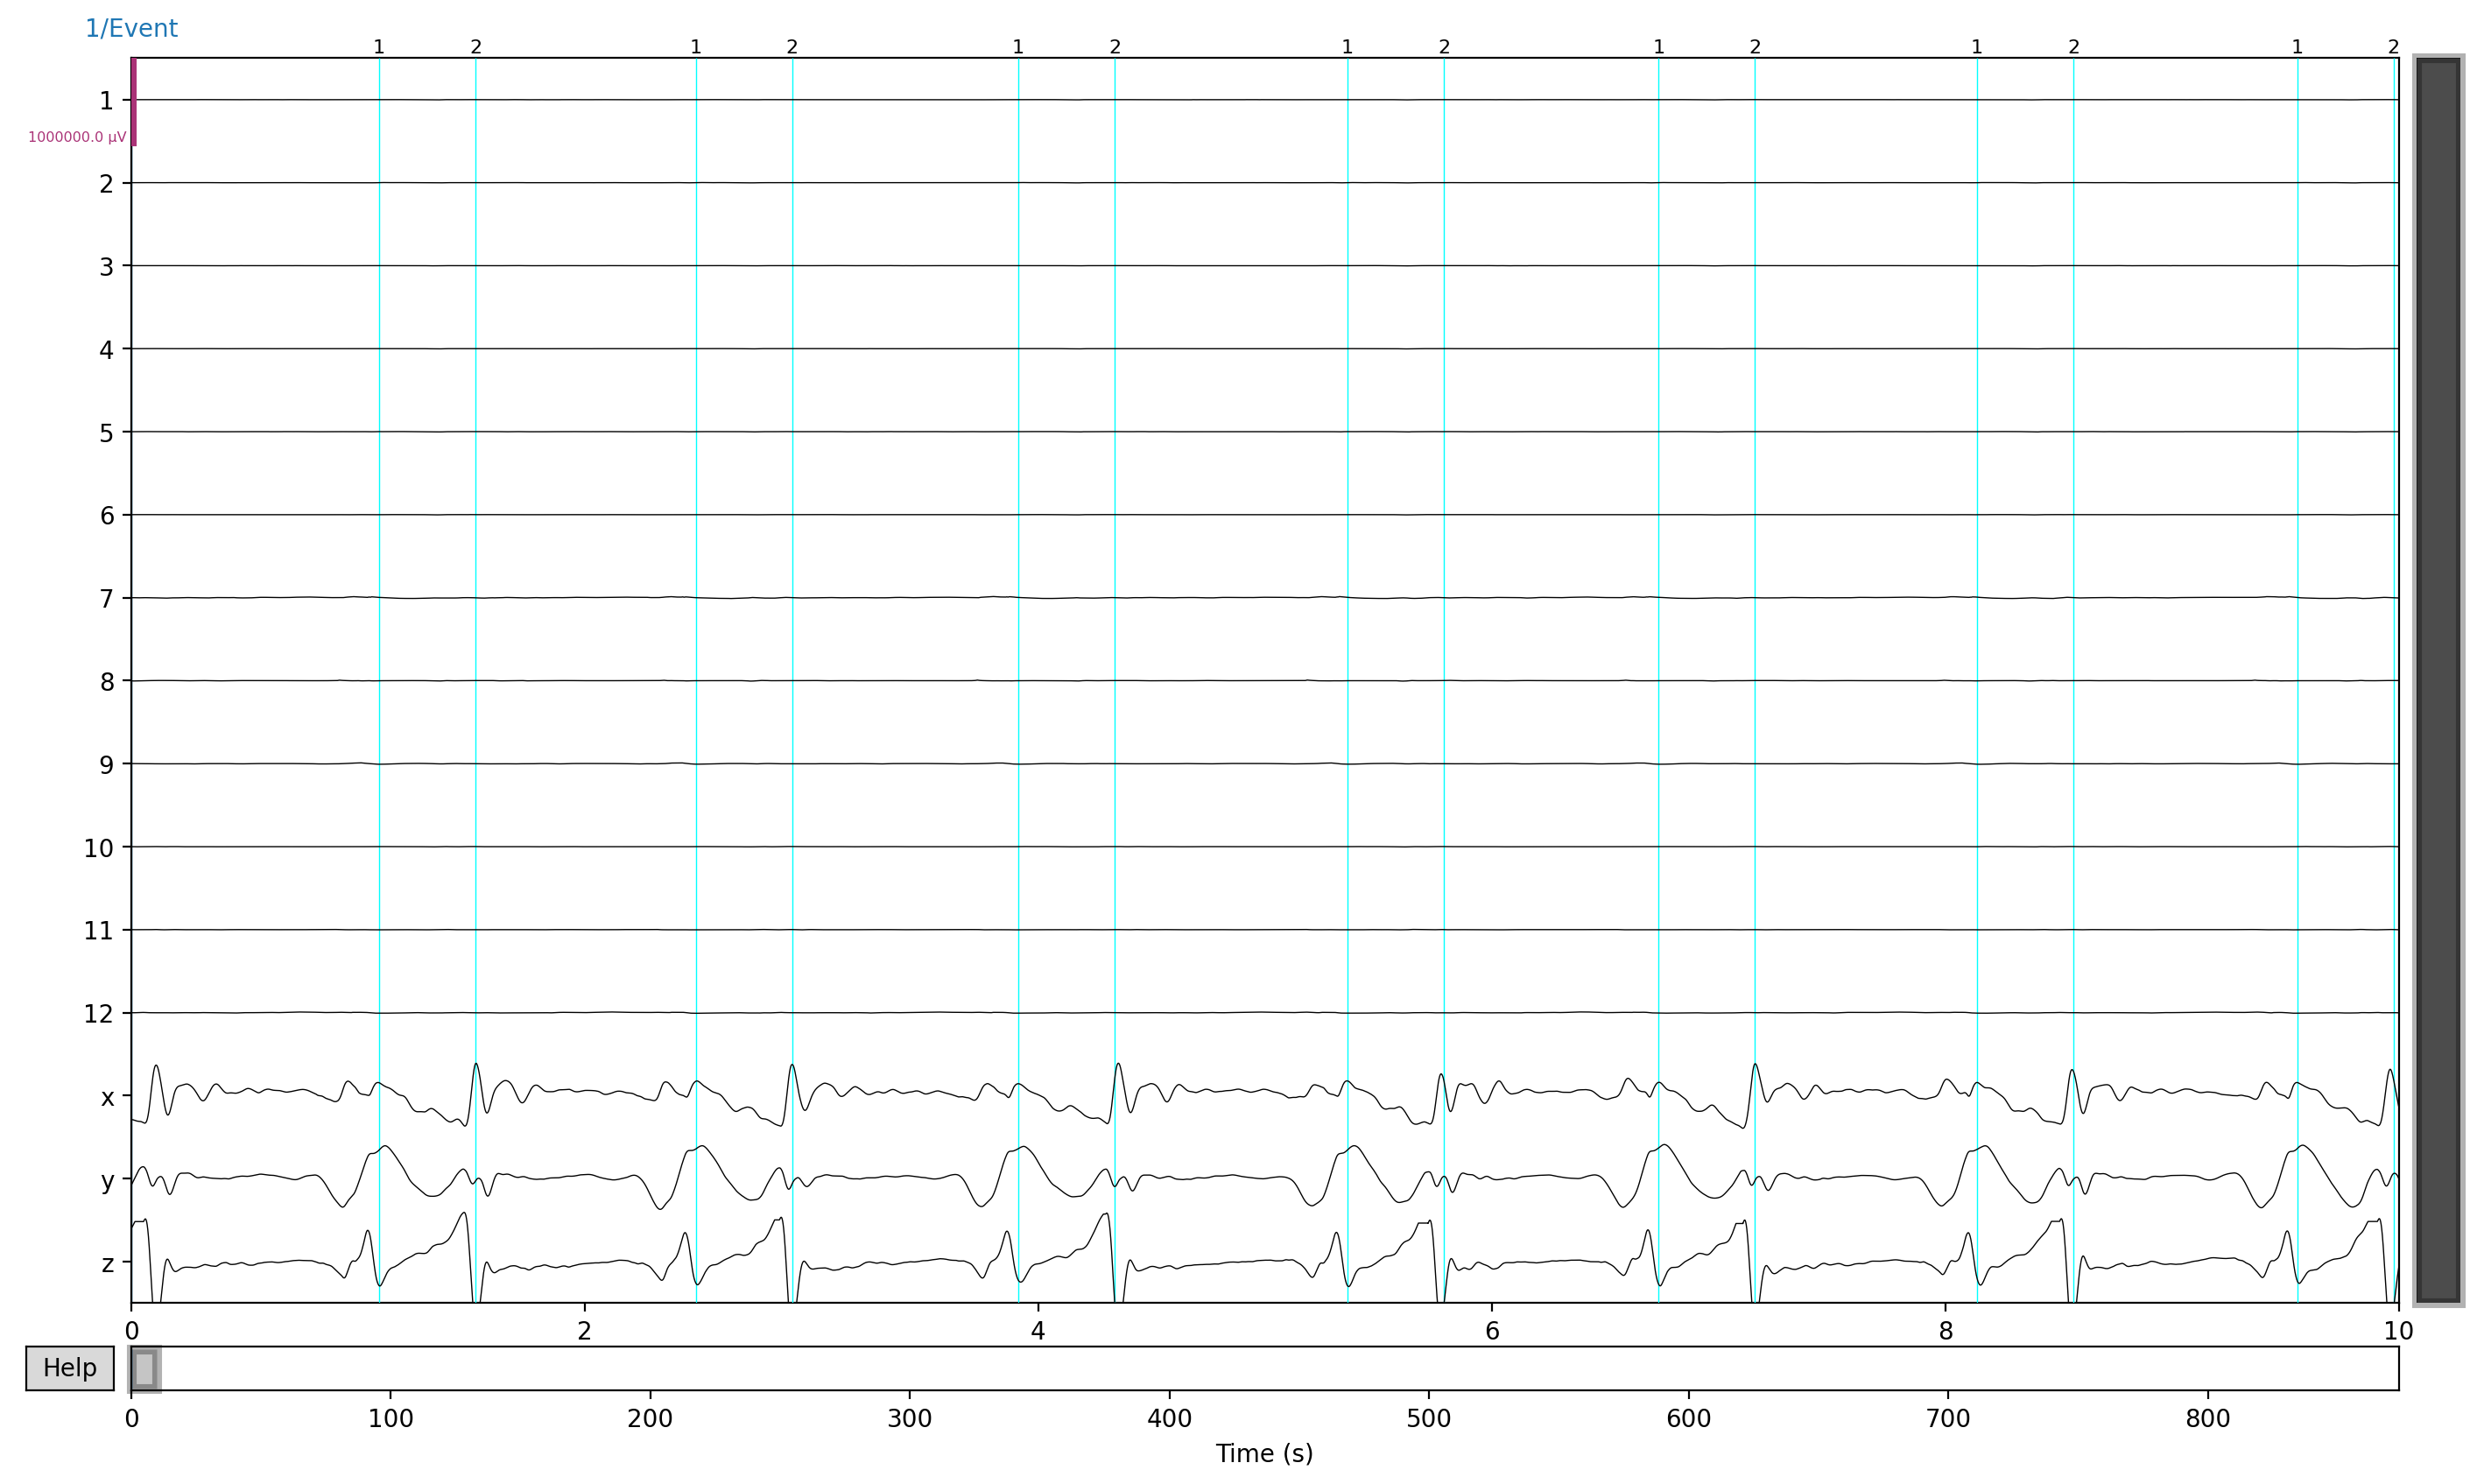

Channels marked as bad: none
Channels marked as bad: none
Channels marked as bad: none
Channels marked as bad: none
Channels marked as bad: none


In [91]:
raw_data.plot(events,scalings={'eeg':5e-1})

In [92]:
raw_data_emg=raw_data.copy().drop_channels(['x','y','z'])


SAMPLING_FREQUENCY = raw_data_emg.info['sfreq']
CHANNEL_NUMBER = len(raw_data_emg.ch_names)
BANDPASS_LIMITS = (200, 500)

In [93]:
raw_hil = raw_data_emg.copy().filter(BANDPASS_LIMITS[0], BANDPASS_LIMITS[1]).apply_hilbert(envelope=True).filter(0, 20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2e+02 - 5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 200.00
- Lower transition bandwidth: 50.00 Hz (-6 dB cutoff frequency: 175.00 Hz)
- Upper passband edge: 500.00 Hz
- Upper transition bandwidth: 125.00 Hz (-6 dB cutoff frequency: 562.50 Hz)
- Filter length: 133 samples (0.067 sec)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter l

In [94]:
epochs=mne.Epochs(raw_hil, events=events, tmin=-0.3, tmax=0.0, 
                        preload=True, 
                        baseline=None).apply_hilbert(envelope=True)

Not setting metadata
Not setting metadata
1198 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1198 events and 601 original time points ...
0 bad epochs dropped


In [95]:
epochs

Number of events,1198
Events,1: 5992: 599
Time range,-0.300 – 0.000 sec
Baseline,off


In [96]:
def get_features_labels(epochs):
    X=[]
    for i in range(epochs._data.shape[0]):
        channel_names = np.arange(CHANNEL_NUMBER).astype(str).tolist()
        channel_types = ['emg']*CHANNEL_NUMBER
        info = mne.create_info(channel_names, SAMPLING_FREQUENCY, channel_types)
        raw = mne.io.RawArray(epochs._data[i], info, verbose=False)
        raw.filter(BANDPASS_LIMITS[0], BANDPASS_LIMITS[1], picks=['emg'], n_jobs=4)
        x__=[]
        # Mean absolute value
        for channel in raw.get_data():
            x__.append(channel.mean())
        # Matematical expactation
        for channel in raw.get_data():
            x__.append(channel.std())
        # Variance
        for channel in raw.get_data():
            x__.append(channel.var())
        # Waveform length
        for channel in raw.get_data():
            x__.append(np.sum(np.diff(channel, n=1)))
        # Number pf peaks
        for channel in raw.get_data():
            x__.append(len(find_peaks(channel)))
        
        # Append PCA of epoch data
        pca = PCA(6)
        pv = pca.fit_transform(epochs._data[i])
                         
        X.append(x__)
    X = np.array(X).squeeze()
    y = epochs.events[:,-1].flatten()
    return X, y


In [97]:

X, y = get_features_labels(epochs)

print('X: ', X.shape)
print('Y: ', y.shape)
#classifier = SVC(C=0.8, kernel='rbf', probability=True)
# cross_val_score(classifier, X, y, cv=3)
#classifier.fit(X, y)
#classifier.score(X, y)


X:  (1198, 60)
Y:  (1198,)


In [98]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib

def conf_matrix_plot(categs, matrix_bef, size=3,perc_flg=True):
    
    group_percentages = ["{0:.2%}".format(value) for value in
                     matrix_bef.flatten()/np.sum(matrix_bef)]
    
    if perc_flg:
        labels = np.asarray(group_percentages).reshape(size,size)
    else:
        labels =matrix_bef
    sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
    matplotlib.rcParams.update({'font.size': 32})
    fig1, ax1 = plt.subplots(figsize=[10,8])
    sns.heatmap(matrix_bef,cmap='Blues',xticklabels=categs,yticklabels=categs,annot=labels, fmt='',ax=ax1)

    #matplotlib.rcParams.update({'font.size': defa})

In [99]:
classifier = SVC(C=0.8, kernel='rbf', probability=True)
#cross_val_score(classifier, X, y, cv=3)
classifier.fit(X, y)
classifier.score(X, y)

0.8330550918196995

In [100]:
tscv=TimeSeriesSplit(max_train_size=None, n_splits=4)

ac_list=[]

for train_index, test_index in tscv.split(X):
    print()
    #print("TRAIN:", train_index, "TEST:", test_index) 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("TRAIN:", X_train.shape,y_train.shape )
    print("TEST:", X_test.shape, y_test.shape) 
    
    
    classifier.fit(X_train, y_train)
    ac=classifier.score(X_test, y_test)
    print('Accuracy:', ac)
    
    ac_list.append(ac)
    
    #matrix=confusion_matrix(y_test,preds)
    
    preds=classifier.predict(X_test)
    matrix=confusion_matrix(y_test,preds)
    #plt.
    
    #conf_matrix_plot(categs, matrix)
    #conf_matrix_plot(categs, matrix , perc_flg=False)
    
    categs=['Фаза-1','Фаза-2']
    conf_matrix_plot(categs, matrix,2)
    conf_matrix_plot(categs, matrix ,2, perc_flg=False)
    


TRAIN: (242, 60) (242,)
TEST: (239, 60) (239,)
Accuracy: 0.7949790794979079

TRAIN: (481, 60) (481,)
TEST: (239, 60) (239,)
Accuracy: 0.7531380753138075

TRAIN: (720, 60) (720,)
TEST: (239, 60) (239,)
Accuracy: 0.8075313807531381

TRAIN: (959, 60) (959,)
TEST: (239, 60) (239,)
Accuracy: 0.8242677824267782


In [101]:
ac_list

[0.7949790794979079,
 0.7531380753138075,
 0.8075313807531381,
 0.8242677824267782]

In [102]:
plt.figure()
plt.plot(np.arange(4),ac_list, 'g.-')
plt.xlabel('Тестируемая выборка')
plt.ylabel('Точность предсказания')
plt.xticks(np.arange(4), ['1-ая четверть', '2-ая четверть', '3-ая четверть','4-ая четверть'])
plt.grid()

In [116]:
zeros=[0]*len(events_max)
marks=[3]*len(events_max)

threes=np.vstack([np.array(events_max)+1300,zeros,marks]).T

#twos=np.vstack([events_max,zeros,marks]).T



In [117]:
raw_data.first_samp

51559

In [118]:
events=np.vstack([ones,twos, threes]) 
events=events[events[:, 0].argsort()]
events[:,0]=events[:,0]#-raw_data.first_samp


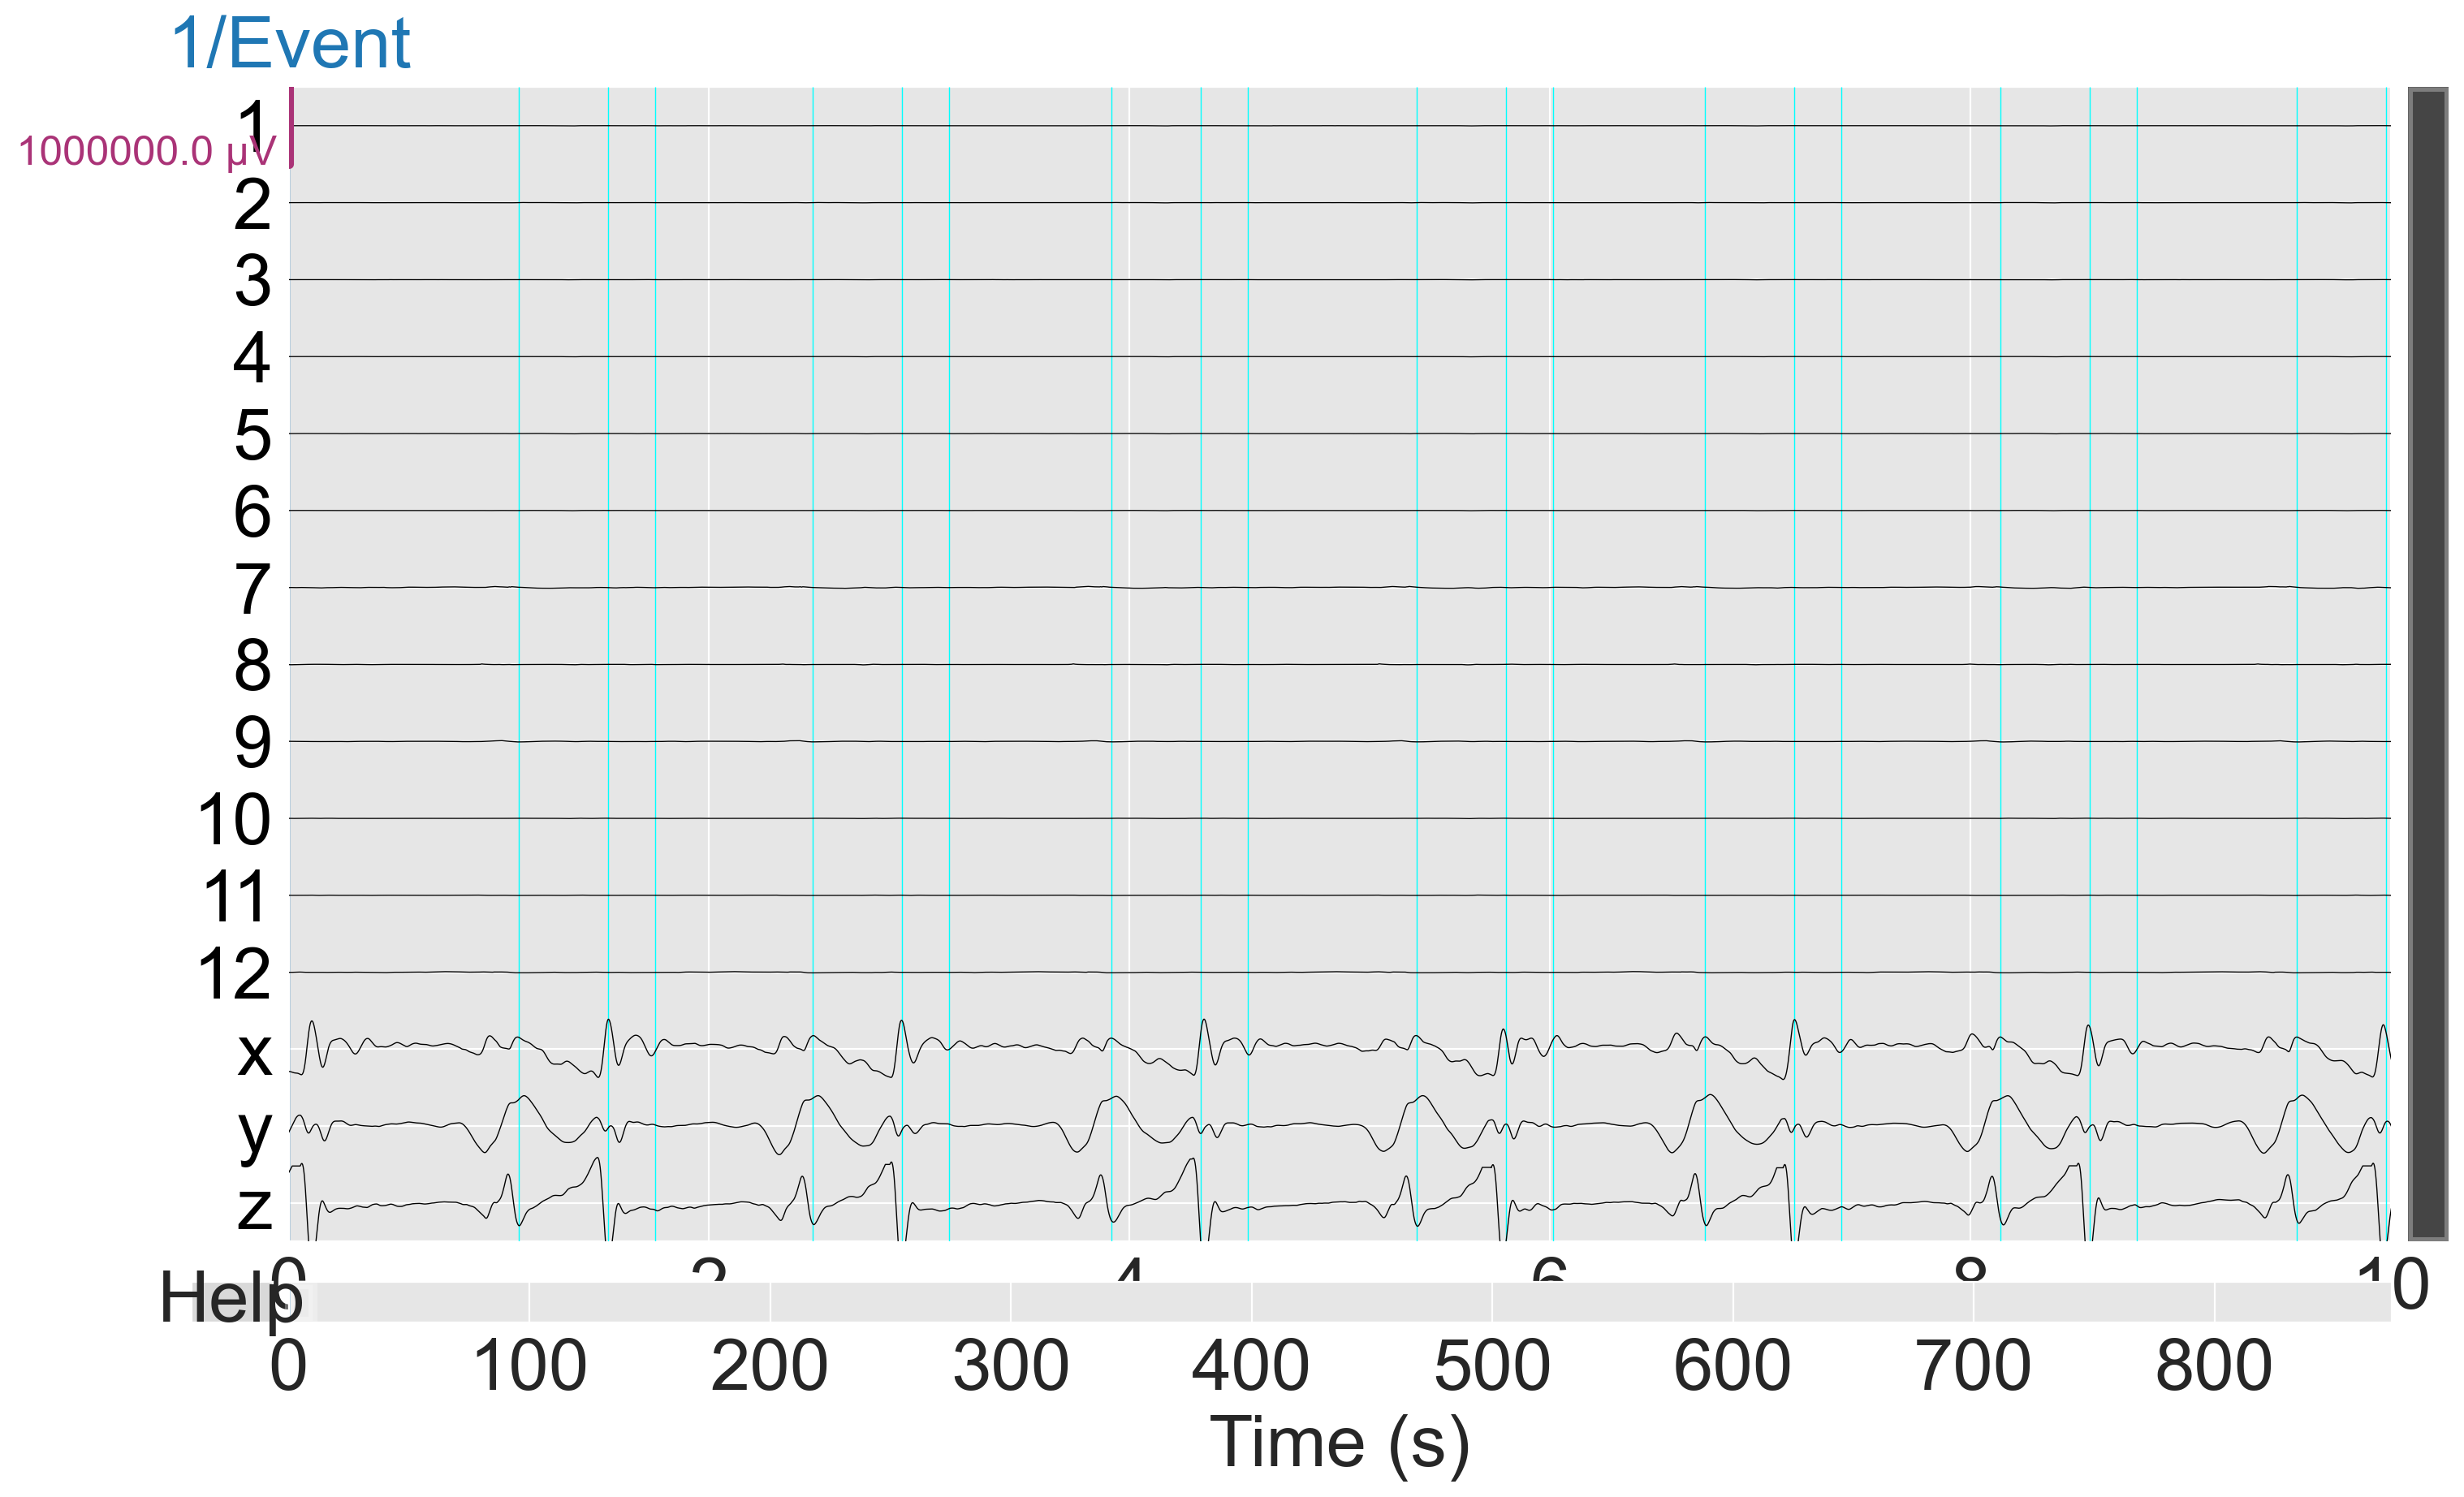

In [119]:
raw_data.plot(events,scalings={'eeg':5e-1})

In [120]:
epochs=mne.Epochs(raw_hil, events=events, tmin=-0.5, tmax=0.0, 
                        preload=True, 
                        baseline=None).apply_hilbert(envelope=True)

Not setting metadata
Not setting metadata
1797 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1797 events and 1001 original time points ...
0 bad epochs dropped


In [106]:
raw_hil.first_samp

2591

In [56]:

X, y = get_features_labels(epochs)

print('X: ', X.shape)
print('Y: ', y.shape)
#classifier = SVC(C=0.8, kernel='rbf', probability=True)
# cross_val_score(classifier, X, y, cv=3)
#classifier.fit(X, y)
#classifier.score(X, y)

X:  (1707, 60)
Y:  (1707,)


In [189]:
classifier = SVC(C=0.8, kernel='rbf', probability=True)
#cross_val_score(classifier, X, y, cv=3)
classifier.fit(X, y)
classifier.score(X, y)

0.6379613356766256

In [213]:
categs=['Фаза-1','Фаза-2', 'Фаза-3', 'Фаза-4']
conf_matrix_plot(categs, matrix)
conf_matrix_plot(categs, matrix , perc_flg=False)

<IPython.core.display.Javascript object>


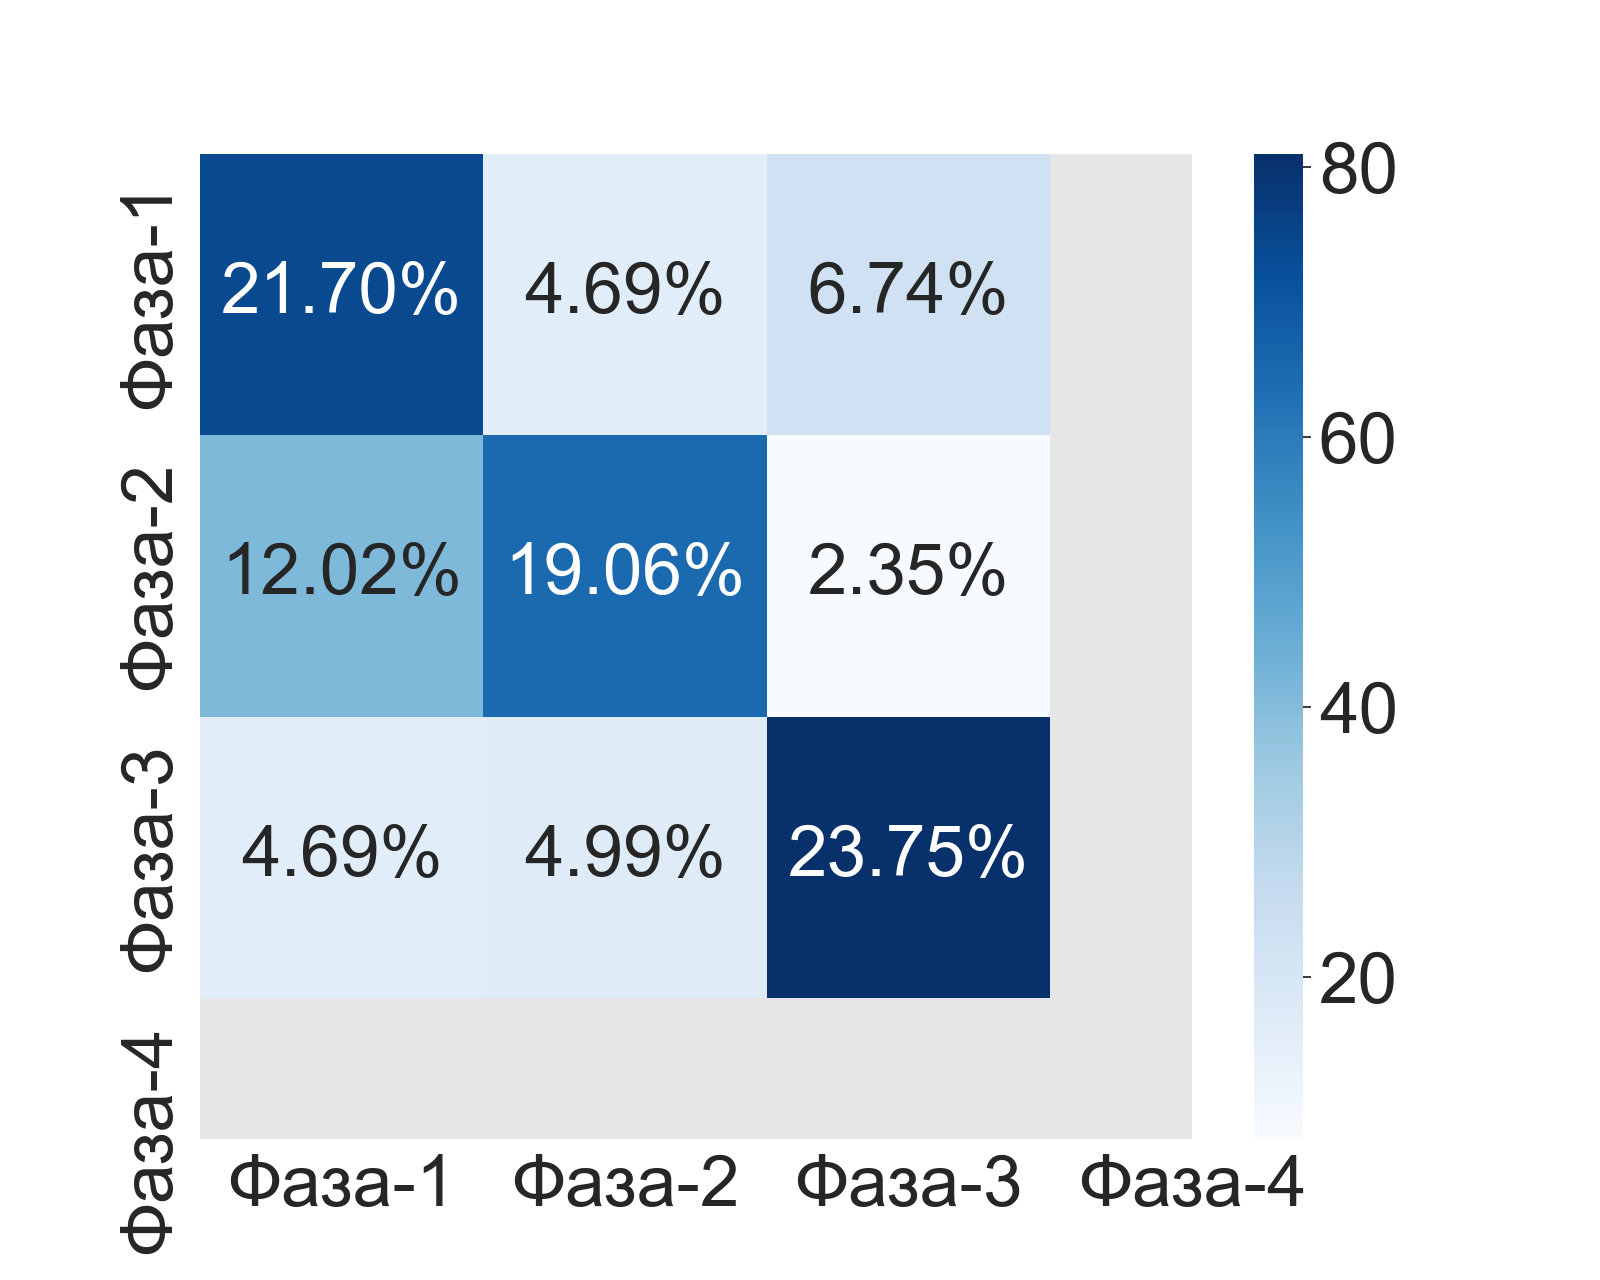

<IPython.core.display.Javascript object>


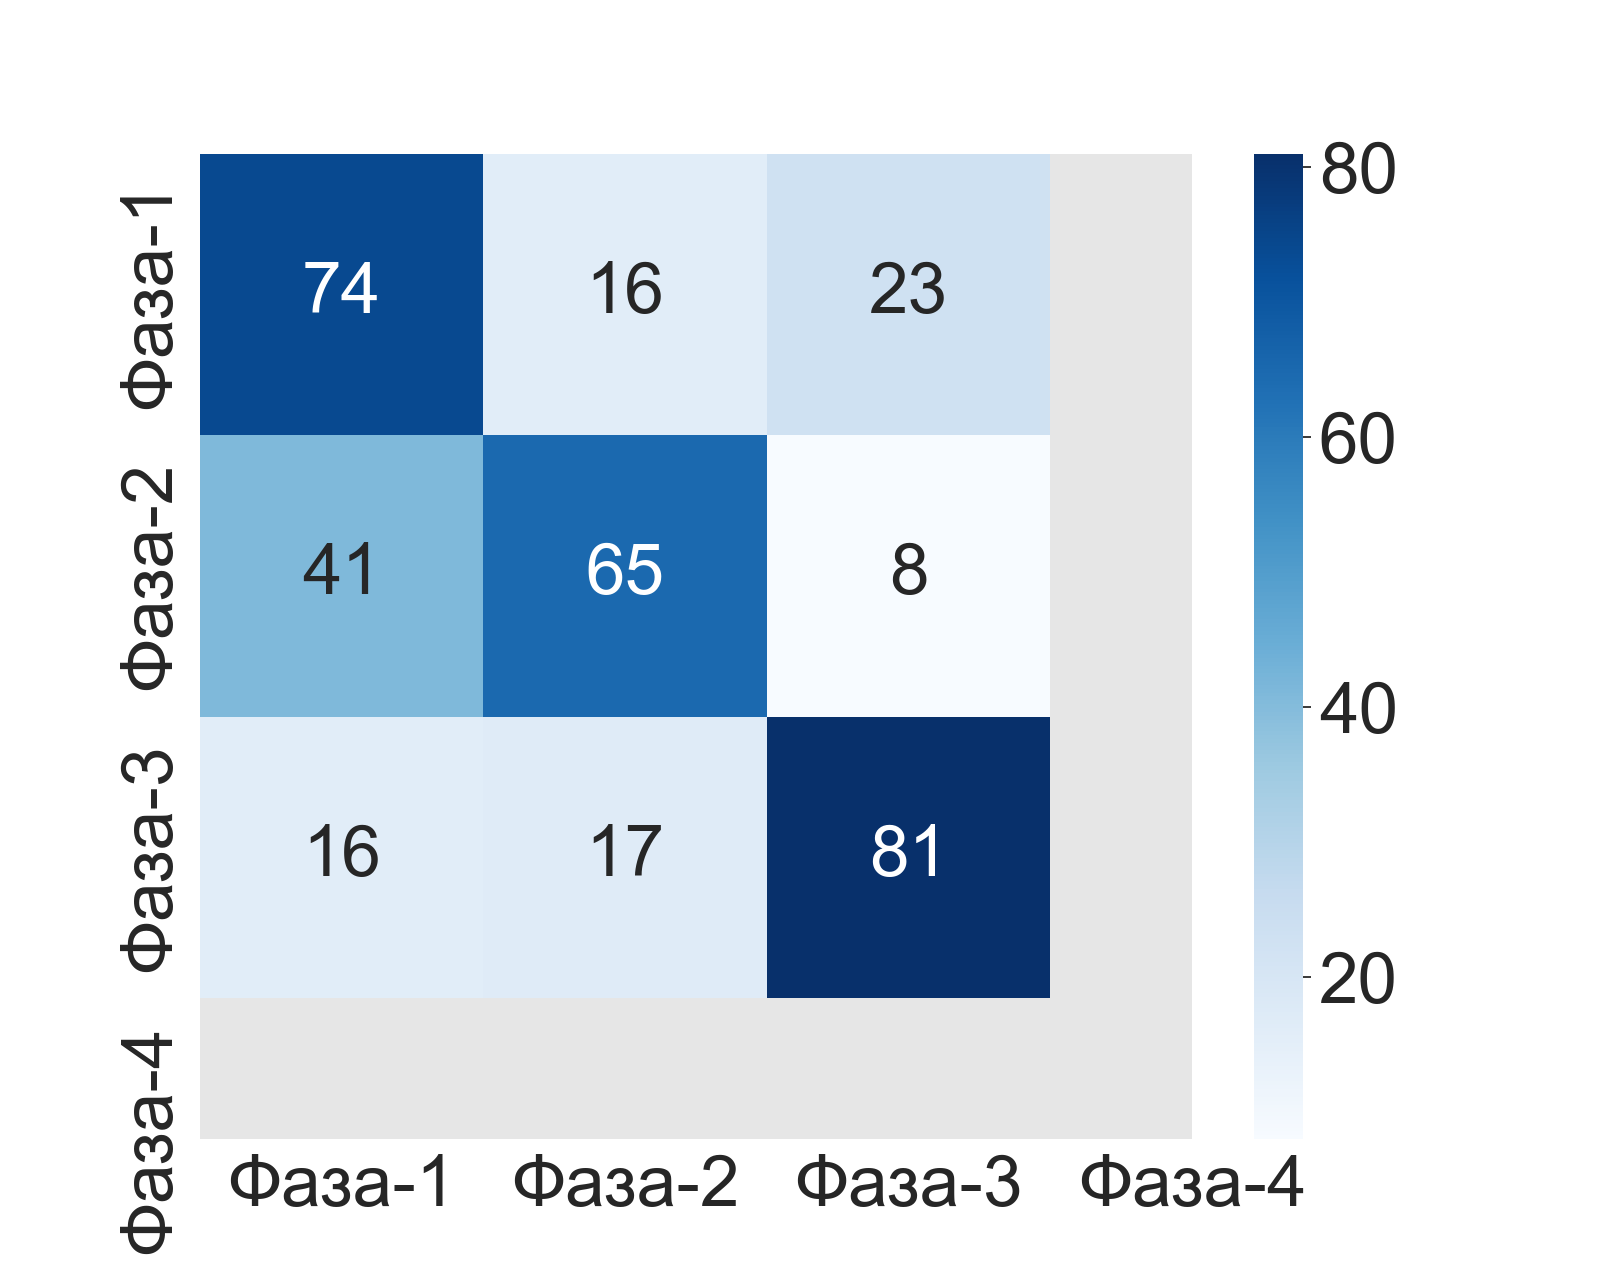

In [215]:
conf_matrix_plot(categs, matrix)
conf_matrix_plot(categs, matrix , perc_flg=False)

In [216]:
tscv=TimeSeriesSplit(max_train_size=None, n_splits=4)
for train_index, test_index in tscv.split(X):
    print()
    #print("TRAIN:", train_index, "TEST:", test_index) 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("TRAIN:", X_train.shape,y_train.shape )
    print("TEST:", X_test.shape, y_test.shape) 
    
    
    classifier.fit(X_train, y_train)
    ac=classifier.score(X_test, y_test)
    print('Accuracy:', ac)
    
    
    preds=classifier.predict(X_test)
    matrix=confusion_matrix(y_test,preds)
    #plt.
    
    conf_matrix_plot(categs, matrix)
    conf_matrix_plot(categs, matrix , perc_flg=False)


TRAIN: (343, 60) (343,)
TEST: (341, 60) (341,)
Accuracy: 0.5571847507331378

TRAIN: (684, 60) (684,)
TEST: (341, 60) (341,)
Accuracy: 0.5043988269794721

TRAIN: (1025, 60) (1025,)
TEST: (341, 60) (341,)
Accuracy: 0.6422287390029325

TRAIN: (1366, 60) (1366,)
TEST: (341, 60) (341,)
Accuracy: 0.6451612903225806


In [121]:
zeros=[0]*len(events_max)
marks=[4]*len(events_max)

fores=np.vstack([np.array(events_max)+1700,zeros,marks]).T

#twos=np.vstack([events_max,zeros,marks]).T




In [122]:

events=np.vstack([ones,twos, threes, fores])
events=events[events[:, 0].argsort()]


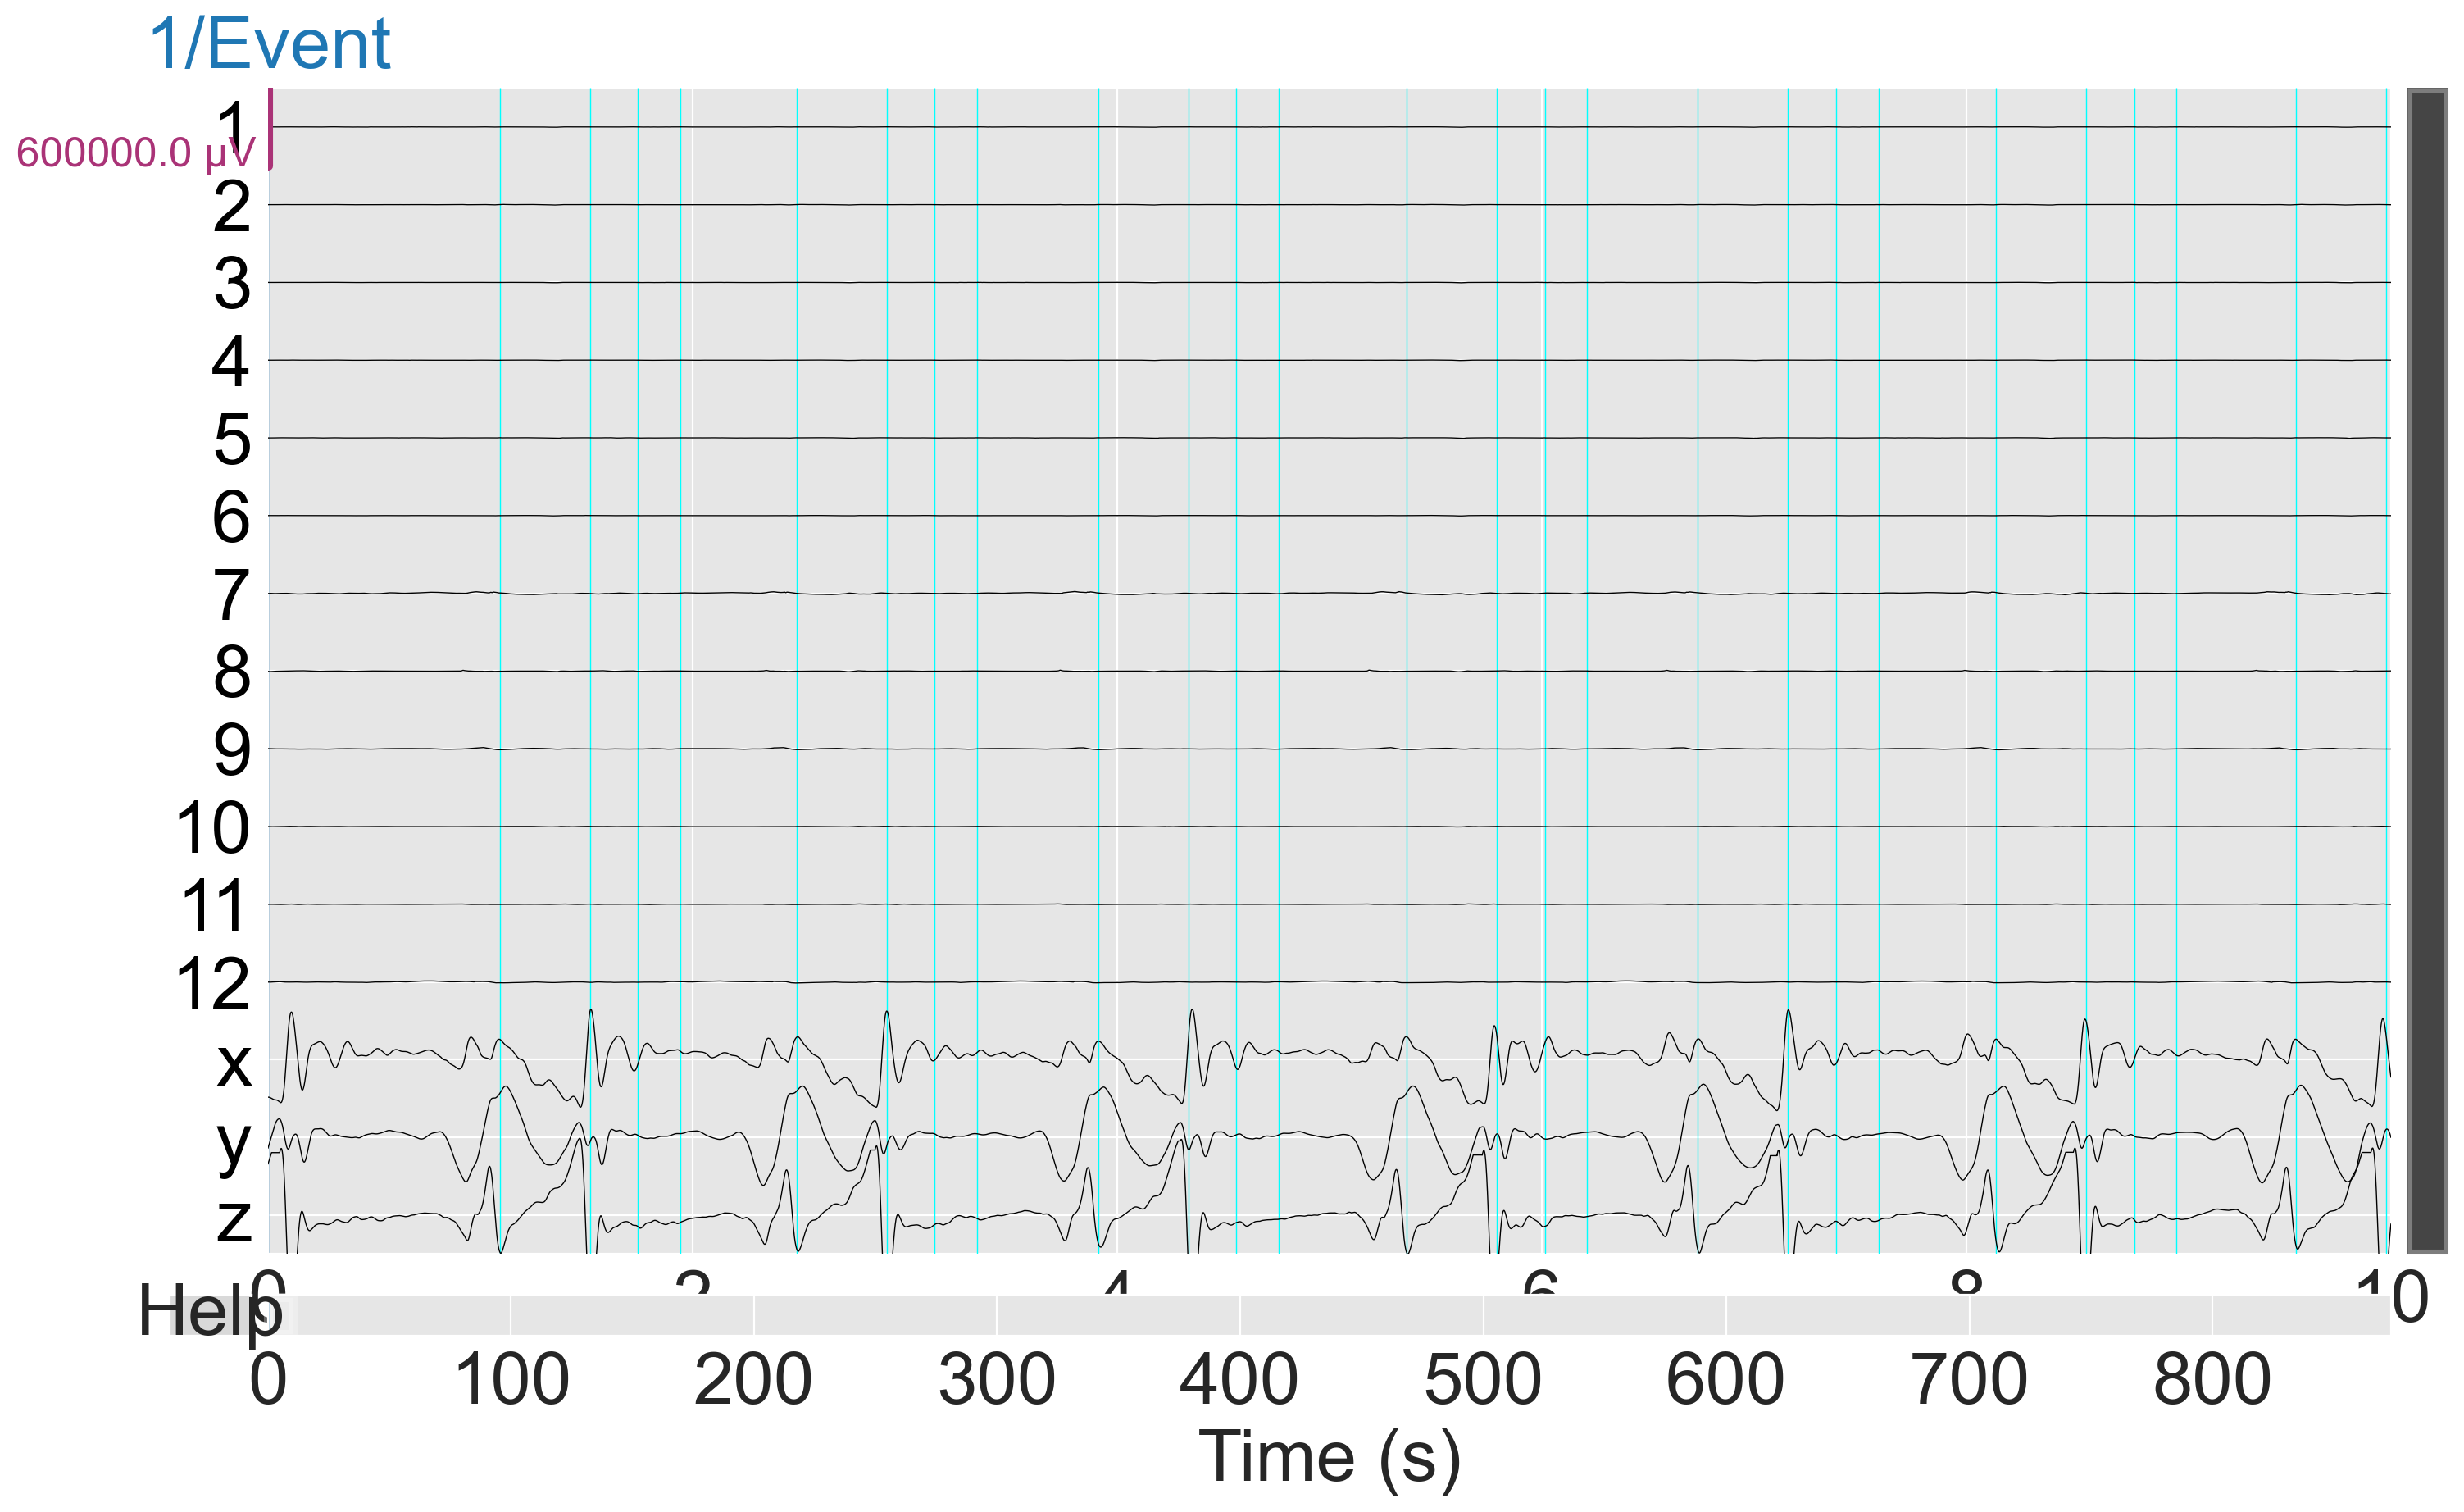

In [123]:
raw_data.plot(events,scalings={'eeg':0.3e0})

In [124]:
print((ones[:,0]/raw_data.info['sfreq'])[:1])#приземление на пятку
print((twos[:,0]/raw_data.info['sfreq'])[:1])#отрыв пятки 
print((threes[:,0]/raw_data.info['sfreq'])[:1])#опопа на пятку 
print((fores[:,0]/raw_data.info['sfreq'])[:1])

[26.873]
[27.298]
[27.523]
[27.723]


In [129]:
#fps = vcap.get(cv2.CV_CAP_PROP_FPS)

video_path='../../../fd.mp4'
def get_frmae(video_path, second):
    
    #start=20
    
    vcap = cv2.VideoCapture( video_path)
    ret, frame = vcap.read()
    #fps = vcap.get(cv2.CAP_PROP_FPS)
    #times 1/24
    
    frame_num=int(second*24)

    for i in range(frame_num):
        #vcap = cv2.VideoCapture('../../../ks.mp4')
        ret, frame = vcap.read()
    #plt.close()
    print(second)
    print(i)
    plt.figure()
    plt.imshow(frame)

    
    #print(f"{fps} frames per second")


In [131]:
ind=14

s=(ones[:,0]/raw_data.info['sfreq'])[ind] #перенос
get_frmae(video_path,s)

s=(twos[:,0]/raw_data.info['sfreq'])[ind] # опора двумя
get_frmae(video_path,s)

s=(threes[:,0]/raw_data.info['sfreq'])[ind]#опора одной
get_frmae(video_path,s)

s=(fores[:,0]/raw_data.info['sfreq'])[ind] #преперенос
get_frmae(video_path,s+0.5)


46.665
1118
47.09
1129
47.315
1134
48.015
1151


In [132]:
events

array([[  53746,       0,       1],
       [  54596,       0,       2],
       [  55046,       0,       3],
       ...,
       [1796703,       0,       2],
       [1797153,       0,       3],
       [1797553,       0,       4]])

In [133]:
epochs=mne.Epochs(raw_hil, events=events, tmin=-0.3, tmax=0.0, 
                        preload=True, 
                        baseline=None).apply_hilbert(envelope=True)

Not setting metadata
Not setting metadata
2396 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2396 events and 601 original time points ...
0 bad epochs dropped


In [134]:

X, y = get_features_labels(epochs)

print('X: ', X.shape)
print('Y: ', y.shape)
#classifier = SVC(C=0.8, kernel='rbf', probability=True)
# cross_val_score(classifier, X, y, cv=3)
#classifier.fit(X, y)
#classifier.score(X, y)

X:  (2396, 60)
Y:  (2396,)


In [135]:
classifier = SVC(C=0.8, kernel='rbf', probability=True)
#cross_val_score(classifier, X, y, cv=3)
classifier.fit(X, y)
classifier.score(X, y)

0.7045075125208681

In [136]:
categs=['Фаза-1','Фаза-2', 'Фаза-3', 'Фаза-4']

In [138]:
tscv=TimeSeriesSplit(max_train_size=None, n_splits=4)
for train_index, test_index in tscv.split(X):
    print()
    #print("TRAIN:", train_index, "TEST:", test_index) 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("TRAIN:", X_train.shape,y_train.shape )
    print("TEST:", X_test.shape, y_test.shape) 
    
    
    classifier.fit(X_train, y_train)
    ac=classifier.score(X_test, y_test)
    print('Accuracy:', ac)
    
    
    preds=classifier.predict(X_test)
    matrix=confusion_matrix(y_test,preds)
    #plt.
    
    conf_matrix_plot(categs, matrix, size=4)
    conf_matrix_plot(categs, matrix , perc_flg=False,size=4)


TRAIN: (480, 60) (480,)
TEST: (479, 60) (479,)
Accuracy: 0.6346555323590815

TRAIN: (959, 60) (959,)
TEST: (479, 60) (479,)
Accuracy: 0.6242171189979123

TRAIN: (1438, 60) (1438,)
TEST: (479, 60) (479,)
Accuracy: 0.7286012526096033

TRAIN: (1917, 60) (1917,)
TEST: (479, 60) (479,)
Accuracy: 0.7369519832985386
